In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = sns.load_dataset('tips')
df1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Skewness & Kurtosis

In [7]:
print('Mean of Total Bill',round(df1['total_bill'].mean(),2))
print('Median of Total Bill',df1['total_bill'].median())

Mean of Total Bill 19.79
Median of Total Bill 17.795


In [5]:
print('Skewness of Total bill',round(df1['total_bill'].skew(),2))

Skewness of Total bill 1.13


The value is greater than zero hence +vely skewed / Right skewed.

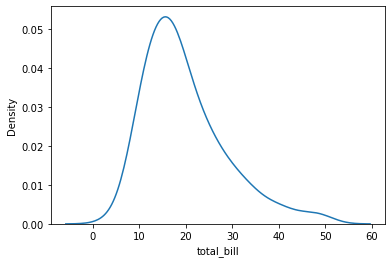

In [8]:
sns.kdeplot(df1['total_bill'])
plt.show()

In [9]:
print("Kurtosis of total bill is",round(df1['total_bill'].kurt(),2))

Kurtosis of total bill is 1.22


1.22 hence the data is Leptokurtic and the outlier does exits. 

# Correlation

In [10]:
df1.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


#### Correlation between total bill & tip is +ve and moderate.
--> As total bill will increase tip as well would increase.

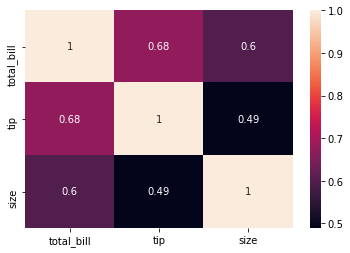

In [11]:
sns.heatmap(df1.corr(),annot=True)
plt.show()

# Doubt question :-

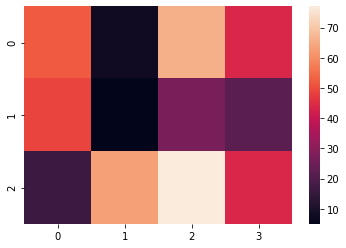

In [12]:
sns.heatmap(np.random.randint(1,101,12).reshape(3,4))
plt.show()

# Covariance

In [13]:
df1.cov()

,total_bill,tip,size
total_bill,79.252939,8.323502,5.065983
tip,8.323502,1.914455,0.643906
size,5.065983,0.643906,0.904591


In [15]:
df1['total_bill'].var()

79.25293861397826

# Handling Categorical Data
# 1. Label Encoder

In [16]:
df1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [17]:
df1['Sex LE1'] = df1['sex'].replace({'Male':1,'Female':0})
df1['Sex LE2'] = df1['sex'].map({'Male':1,'Female':0})
df1.head()

,total_bill,tip,sex,smoker,day,time,size,Sex LE1,Sex LE2
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0


In [18]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [19]:
df1['Day LE'] = LE.fit_transform(df1['day'])
df1.head()

,total_bill,tip,sex,smoker,day,time,size,Sex LE1,Sex LE2,Day LE
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0,2
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1,2
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1,2
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1,2
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0,2


In [20]:
df1['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']

In [21]:
df1['Day LE'].unique()

array([2, 1, 3, 0])

# One Hot Encoding

In [22]:
df1 = sns.load_dataset('tips')
df1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [23]:
pd.get_dummies(df1['sex']).head()

,Male,Female
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [24]:
pd.get_dummies(df1['day']).head()

,Thur,Fri,Sat,Sun
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [29]:
pd.get_dummies(df1['day'],drop_first=True).head()

,Fri,Sat,Sun
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [26]:
pd.get_dummies(data=df1,columns=['sex']).head()

,total_bill,tip,smoker,day,time,size,sex_Male,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,1


In [27]:
pd.get_dummies(data=df1,columns=['sex'],drop_first=True).head()

,total_bill,tip,smoker,day,time,size,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,1
1,10.34,1.66,No,Sun,Dinner,3,0
2,21.01,3.50,No,Sun,Dinner,3,0
3,23.68,3.31,No,Sun,Dinner,2,0
4,24.59,3.61,No,Sun,Dinner,4,1


# Frequency Encoder

In [30]:
df1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [32]:
df1['sex'].value_counts(normalize=True)

Male      0.643443
Female    0.356557
Name: sex, dtype: float64

In [35]:
df1['sex'].value_counts()/len(df1)

Male      0.643443
Female    0.356557
Name: sex, dtype: float64

In [33]:
df1['SEX FE'] = df1['sex'].replace(df1['sex'].value_counts(normalize=True))
df1.head()

,total_bill,tip,sex,smoker,day,time,size,SEX FE
0,16.99,1.01,Female,No,Sun,Dinner,2,0.356557
1,10.34,1.66,Male,No,Sun,Dinner,3,0.643443
2,21.01,3.50,Male,No,Sun,Dinner,3,0.643443
3,23.68,3.31,Male,No,Sun,Dinner,2,0.643443
4,24.59,3.61,Female,No,Sun,Dinner,4,0.356557


# Zscore Scaling - Standardization

In [36]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

In [39]:
df1['ZTB'] = SS.fit_transform(df1[['total_bill']])
df1.head()

,total_bill,tip,sex,smoker,day,time,size,SEX FE,ZTB
0,16.99,1.01,Female,No,Sun,Dinner,2,0.356557,-0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,0.643443,-1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,0.643443,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,0.643443,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0.356557,0.540745


In [40]:
print('Skewness of original total bill ',df1['total_bill'].skew())
print('Skewness of Zscore total bill ',df1['ZTB'].skew())

Skewness of original total bill  1.1332130376158205
Skewness of Zscore total bill  1.1332130376158205


In [41]:
print('Kurtosis of original total bill ',df1['total_bill'].kurt())
print('Kurtosis of Zscore total bill ',df1['ZTB'].kurt())

Kurtosis of original total bill  1.2184840156638854
Kurtosis of Zscore total bill  1.2184840156638836


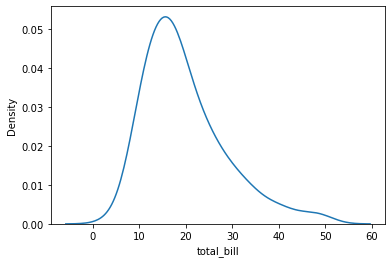

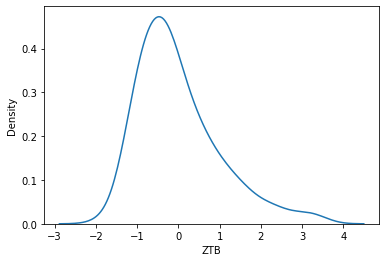

In [42]:
sns.kdeplot(df1['total_bill'])
plt.show()
sns.kdeplot(df1['ZTB'])
plt.show()